In [159]:
import pandas as pd
import matplotlib.pyplot as plt

# Loading dataset

In [160]:
dataset=pd.read_csv('titanic.csv')
dataset


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# droping multiple columns at once


In [161]:
columns_to_drop=['Survived','PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked']
inputs=dataset.drop(columns=columns_to_drop)
target=dataset['Survived']

# solving for missing value


In [162]:
import math
inputs.Age.median()
inputs.Age=inputs.Age.fillna(inputs.Age.median())

# solving for string value in dataset

In [163]:
from sklearn.preprocessing import LabelEncoder
le_sex=LabelEncoder()
inputs['Sex']=le_sex.fit_transform(inputs['Sex'])

# seperating data for traning and testing

In [164]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(inputs,target,test_size=0.2)

ValueError: Supply a 'c' argument or a 'color' kwarg but not both; they differ but their functionalities overlap.

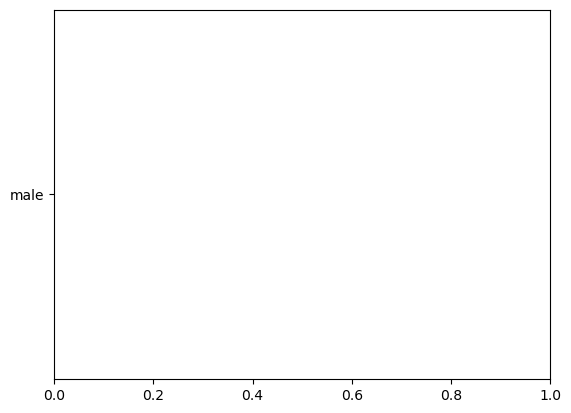

In [176]:
plt.scatter(dataset.Age,dataset.Sex,dataset.Pclass,dataset.Fare,color='red' ,marker='+')


# Importing learning Algorithm 

In [142]:
from sklearn import tree
model=tree.DecisionTreeClassifier()

# traning model

In [143]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

# testing accuracy.

In [149]:
model.score(x_test,y_test)

0.8044692737430168

# predicting for new inputs.

In [145]:
model.predict([[1,0,38,71.2833]])

/Users/user/anaconda3/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

# exporting model as file.

In [146]:
import joblib

In [147]:
joblib.dump(model,'Titanic.pkl')

['Titanic.pkl']

# Loading and testing model

In [148]:
model=joblib.load('Titanic.pkl')
model.predict([[1,0,38,71.2833]])

/Users/user/anaconda3/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])